<a href="https://colab.research.google.com/github/TVHM/summer_microcredentials_BUS/blob/main/yfinance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [517]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [518]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [519]:
import yfinance as yf

In [520]:
ticker = 'AAPL'

In [521]:
aapl = yf.Ticker(ticker)

In [522]:
aapl.get_institutional_holders()

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",1277319054,2022-06-29,0.0795,219331133514
1,Blackrock Inc.,1028688317,2022-06-29,0.0640,176638228244
2,"Berkshire Hathaway, Inc",894802319,2022-06-29,0.0557,153648382746
3,State Street Corporation,598178524,2022-06-29,0.0372,102714488836
4,"FMR, LLC",344317974,2022-06-29,0.0214,59123561408
5,"Geode Capital Management, LLC",278256192,2022-06-29,0.0173,47779954278
6,Price (T.Rowe) Associates Inc,237910783,2022-06-29,0.0148,40852159487
7,Morgan Stanley,182450565,2022-06-29,0.0114,31328969145
8,Northern Trust Corporation,179828922,2022-06-29,0.0112,30878801328
9,Bank of America Corporation,149133915,2022-06-29,0.0093,25608097303


In [523]:
aapl.get_major_holders()

,0,1
0,0.07%,% of Shares Held by All Insider
1,59.75%,% of Shares Held by Institutions
2,59.79%,% of Float Held by Institutions
3,5492,Number of Institutions Holding Shares


In [524]:
#define a data frame and name the object
aapl = aapl.history(period='max')

In [525]:
aapl.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-08-15,171.520004,173.389999,171.350006,173.190002,54091700,0.0,0.0
2022-08-16,172.779999,173.710007,171.660004,173.029999,56377100,0.0,0.0
2022-08-17,172.770004,176.149994,172.570007,174.550003,79542000,0.0,0.0
2022-08-18,173.750000,174.899994,173.119995,174.149994,62214200,0.0,0.0
2022-08-19,173.029999,173.740005,171.700104,171.700394,27955114,0.0,0.0


In [526]:
aapl.info

<bound method DataFrame.info of                   Open        High         Low       Close     Volume  \
Date                                                                    
1980-12-12    0.100039    0.100474    0.100039    0.100039  469033600   
1980-12-15    0.095255    0.095255    0.094820    0.094820  175884800   
1980-12-16    0.088296    0.088296    0.087861    0.087861  105728000   
1980-12-17    0.090035    0.090470    0.090035    0.090035   86441600   
1980-12-18    0.092646    0.093081    0.092646    0.092646   73449600   
...                ...         ...         ...         ...        ...   
2022-08-15  171.520004  173.389999  171.350006  173.190002   54091700   
2022-08-16  172.779999  173.710007  171.660004  173.029999   56377100   
2022-08-17  172.770004  176.149994  172.570007  174.550003   79542000   
2022-08-18  173.750000  174.899994  173.119995  174.149994   62214200   
2022-08-19  173.029999  173.740005  171.700104  171.700394   27955114   

            Divide

In [527]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10511 entries, 1980-12-12 to 2022-08-19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10511 non-null  float64
 1   High          10511 non-null  float64
 2   Low           10511 non-null  float64
 3   Close         10511 non-null  float64
 4   Volume        10511 non-null  int64  
 5   Dividends     10511 non-null  float64
 6   Stock Splits  10511 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 656.9 KB


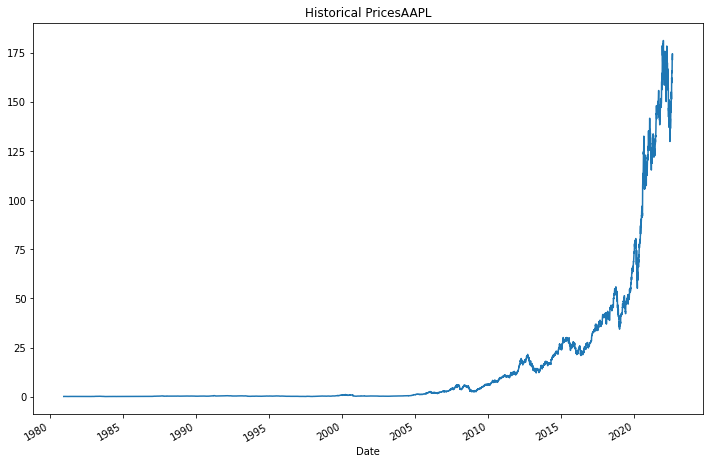

In [528]:
aapl.Close.plot(figsize=(12,8), title='Historical Prices'+ticker)

In [529]:
import plotly.express as px

In [530]:
fig = px.line(aapl,x= aapl.index, y= 'Close', title = 'Interactive Graph for ' +ticker)
fig.show()

In [531]:
#pandas datareader 
import pandas_datareader.data as web
import datetime as dt

In [532]:
f = web.DataReader('^DJI', 'stooq')

In [533]:
import pandas_datareader.data as pdr
from datetime import date, timedelta, datetime
end = date.today()
#start = datetime(year=end.year, month=end.month-1, day=end.day ) 

In [534]:
#f = pdr.get_data_moex()

In [535]:
#define the data range
end = date.today()

print(f'year={end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-40, month=end.month, day=end.day)

print(f'Period 1 year until today: {start} to {end}')

year=2022; month= 8; day=19
Period 1 year until today: 1982-08-19 to 2022-08-19


In [536]:
spx_index = pdr.get_data_stooq('^SPX', start,end) 

In [537]:
spx_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10085 entries, 2022-08-18 to 1982-08-19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    10085 non-null  float64
 1   High    10085 non-null  float64
 2   Low     10085 non-null  float64
 3   Close   10085 non-null  float64
 4   Volume  10085 non-null  float64
dtypes: float64(5)
memory usage: 472.7 KB


In [538]:
spx_index

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-18,4273.13,4292.53,4261.98,4283.74,1.744943e+09
2022-08-17,4280.40,4302.18,4253.08,4274.04,1.861059e+09
2022-08-16,4290.46,4325.28,4277.77,4305.20,1.909934e+09
2022-08-15,4269.37,4301.79,4256.90,4297.14,1.775708e+09
2022-08-12,4225.02,4280.47,4219.78,4280.15,1.837440e+09
...,...,...,...,...,...
1982-08-25,115.35,118.12,115.11,117.58,5.900000e+07
1982-08-24,116.11,116.39,115.08,115.35,6.758333e+07
1982-08-23,113.02,116.11,112.65,116.11,6.128333e+07


In [539]:
spx_index.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-18,4273.13,4292.53,4261.98,4283.74,1.744943e+09
2022-08-17,4280.40,4302.18,4253.08,4274.04,1.861059e+09
2022-08-16,4290.46,4325.28,4277.77,4305.20,1.909934e+09
2022-08-15,4269.37,4301.79,4256.90,4297.14,1.775708e+09
2022-08-12,4225.02,4280.47,4219.78,4280.15,1.837440e+09


In [540]:
#graph

In [541]:
!pip install quandl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [542]:
import quandl

In [543]:
f = web.DataReader('^AAPL', 'stooq', start='2019-09-10', end='2019-10-09')
aapl.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100039,0.100474,0.100039,0.100039,469033600,0.0,0.0
1980-12-15,0.095255,0.095255,0.094820,0.094820,175884800,0.0,0.0
1980-12-16,0.088296,0.088296,0.087861,0.087861,105728000,0.0,0.0
1980-12-17,0.090035,0.090470,0.090035,0.090035,86441600,0.0,0.0
1980-12-18,0.092646,0.093081,0.092646,0.092646,73449600,0.0,0.0


In [544]:
stock_price = aapl
stock_price.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,10511.000000,10511.000000,10511.000000,10511.000000,1.051100e+04,10511.000000,10511.000000
mean,14.673485,14.838489,14.513067,14.682736,3.297796e+08,0.000628,0.001617
std,32.746788,33.139165,32.376294,32.776662,3.385603e+08,0.010334,0.085579
min,0.038711,0.038711,0.038276,0.038276,0.000000e+00,0.000000,0.000000
25%,0.236020,0.241941,0.230471,0.236123,1.229098e+08,0.000000,0.000000
50%,0.395507,0.402216,0.388150,0.395355,2.173696e+08,0.000000,0.000000
75%,13.234792,13.401823,13.100304,13.245819,4.092116e+08,0.000000,0.000000
max,181.877391,182.186111,178.381846,181.259933,7.421641e+09,0.230000,7.000000


In [545]:
import yfinance as yf
import pandas as pd

aapl = yf.Ticker('AAPL')
aapl.info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 154000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [546]:
from pandas.core.frame import DataFrame
#get historical market data 
hist_data = aapl.history(period='6mo')

print(hist_data)


                  Open        High         Low       Close     Volume  \
Date                                                                    
2022-02-22  164.509440  166.214569  161.687510  163.851334   91162800   
2022-02-23  165.067849  165.676110  159.294370  159.613464   90009200   
2022-02-24  152.144822  162.385535  151.566475  162.275848  141147500   
2022-02-25  163.372693  164.649041  160.411163  164.379822   91974200   
2022-02-28  162.594926  164.948195  161.966718  164.649048   95056600   
...                ...         ...         ...         ...        ...   
2022-08-15  171.520004  173.389999  171.350006  173.190002   54091700   
2022-08-16  172.779999  173.710007  171.660004  173.029999   56377100   
2022-08-17  172.770004  176.149994  172.570007  174.550003   79542000   
2022-08-18  173.750000  174.899994  173.119995  174.149994   62214200   
2022-08-19  173.029999  173.740005  171.699997  171.740005   28021476   

            Dividends  Stock Splits  
Date        

In [547]:
tickers = yf.Tickers('aapl')
print(tickers)



yfinance.Tickers object <AAPL>


In [548]:
#show dividends
aapl.dividends 

Date
2022-05-06    0.23
2022-08-05    0.23
Name: Dividends, dtype: float64

In [549]:
aapl.get_analysis

<bound method TickerBase.get_analysis of yfinance.Ticker object <AAPL>>

In [550]:
#show earnings
aapl.earnings
aapl.quarterly_earnings
print()